## 1. 의사결정 나무 
### 의사결정나무 모형

#### 의사결정나무 모형
> - 의사결정나무 모형이란 특정 항목에 대한 의사결정 규칙을 나무 형태로 분류해 나가는 분석기법을 말한다. 
> - 조건문 형식을 가지는 것으로서 조건에 맞는지 여부에 따라 가지를 반복 분할하면서 모델을 만든다. 
> - 의사결정나무는 분류 조건이 명료할수록 유용하며, 전문가 프로그램에서 많이 사용되었다. 
> - 결과를 해석하고 이해하기 쉽다. 

#### 의사결정나무의 구조
> - 뿌리 마디: 나무 구조가 시작되는 노드로, 분석 대상의 모든 데이터로 구성된다. 
> - 자식 마디: 하나의 노드로부터 분기되어 나간 두 개 이상의 노드로, 분석 대상 데이터는 노드의 특성에 따라 분리된다. 
> - 부모 마디: 자식 마디의 상위 노드이다. 
> - 끝 마디: 각 나무가지의 끝에 있는 노드로, 나무 모형에서 분류의 규칙은 끝마디의 개수만큼 생성된다. 

#### 의사결정나무 모형의 학습 방법
> - 의사결정나무의 '학습'은 학습에 사용되는 데이터 집합을 적절한 분할 기준 또는 분할 테스트에 따라 나누는 과정이다. 
> - 순환 분할 방식으로서 더는 순수도를 높일 수 없거나, 말단 노드에 포함된 개체의 수가 사전에 정한 최솟값에 도달하였거나, 노드의 깊이가 사전에 정해놓은 한계에 이를 때까지 재귀적으로 분할이 반복된다. 
> - 이를 하향식 결정 트리 귀납법이라고 한다. 
> - 가지치기의 기준은 순수도(purity)를 높여줄 수 있는 변수를 먼저 선택해 진행한다. 
> - 순수도를 측정하는 척도로는 지니 척도(Gini measure), 정보 이익(Information Gain = entropy)이 많이 사용된다. 

#### 지니척도
> - 지니 척도는 두번을 복원추출 했을 때, 동일범주 개체가 선택될 확률이다. 
> - 데이터를 a변수로 나누었더니 A그룹이, b변수로는 B그룹이 만들어졌다면 
> - A 그룹은 9/10, B그룹은 5/10이라면 
    > - 지니척도는 A = (0.1)^2 + (0.9)^2 / B = (0.5)^2 + (0.5)^2
    
> - 지니 척도는 순수도가 높을수록 1에, 균등할수록 0.5에 가까워진다. 
> - 불순도를 구할 때는 1에서 위의 값을 뺀 값을 구한다(0.18,0.5)
> - 따라서 A그룹의 순수도가 더 높으므로 (A:0.82 > B:0.5)

> - 정보이익은 엔트로피의 개념을 사용한다. 
> - 만일 어떤 그룹에 두 개의 종류가 섞여 있고, 각 종류가 존재할 확률이 p1,p2일때 엔트로피 식은 다음과 같다. (p.525참고)
> - 만일 두 범주의 확률이 모두 0.5이면 엔트로피는 1이된다.. 
> - 만약 한 범주만 있는 완전히 순수한 상태이면 엔트로피는 0이다. 
> - 정보이익은 분리전과 분리후의 엔트로피 차이를 계산해 얻는다. 
> - 비교 대상인 두 개 변수의 정보이익을 구하여 더 큰 쪽을 분리 기준으로 삼는다.


#### 자료준비 

In [42]:
autoparts <- read.csv('autoparts.csv',header = TRUE)
autoparts1 <- autoparts[autoparts$prod_no == '90784-76001',c(2:11)]
autoparts2 <- autoparts1[autoparts$c_thickness < 1000,]
autoparts2$y_faulty <- ifelse((autoparts2$c_thickness < 20) | (autoparts2$c_thickness > 32),1,0)

In [26]:
# 데이터 셋을 training set과 test set으로 분할
t_index <- sample(1:nrow(autoparts2),size = nrow(autoparts2)*0.7)
train <- autoparts2[t_index,]
test <- autoparts2[-t_index,]


In [5]:
nrow(train)
nrow(test)

[1] 23888

[1] 10239

In [ ]:
# package 설치
install.packages('tree')
library(tree)

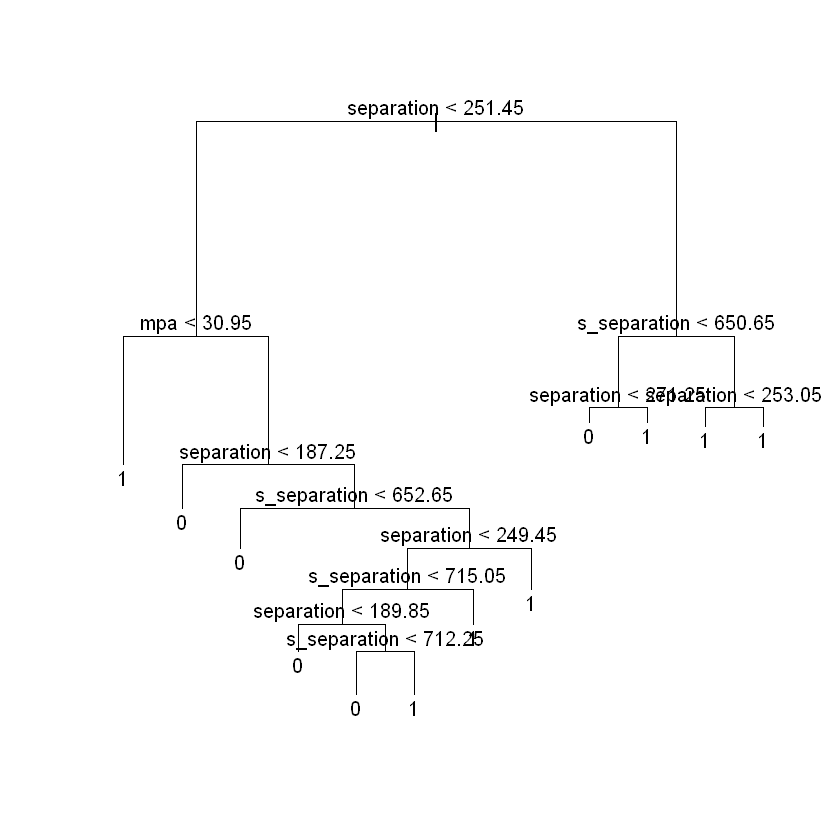

In [59]:
m <- tree(factor(y_faulty) ~ fix_time + a_speed + b_speed + separation +
          s_separation + rate_terms + mpa + load_time + highpressure_time , data = train)
# 모델 시각화
plot(m)
# 모델 설명 
text(m)

#### 가지 줄이기
> - 가지가 너무 많아 규칙이 복잡하다고 생각되면 가지치기를 할 수 있다

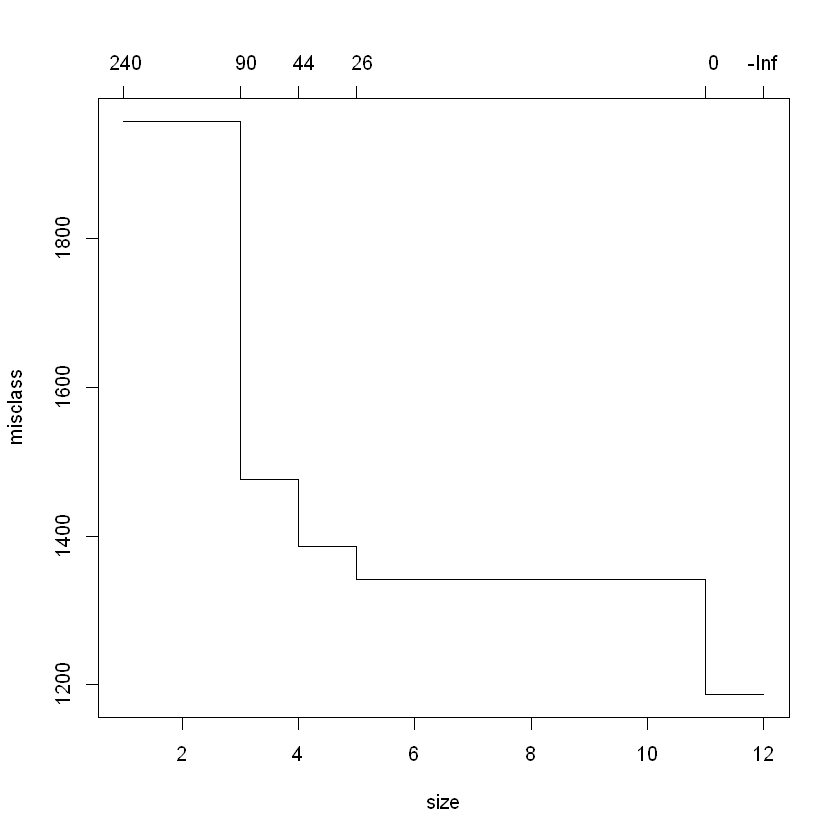

In [28]:
prune.m <- prune.tree(m,method = 'misclass') 
# misclass = 잘못된 분류를 기준으로 가지치기
# default값은 deviance이고 그렇게 두어도 큰 차이는 없다. 
plot(prune.m)
# 어느정도 가지를 가지면 잘못된 분석이 줄어지는지에 대한 감각을 가질 수 있다.
# 가지가 9 정도면 잘못된 분석이 매우 떨어짐 
# 가지가 3 정도만 되어도 잘못된 분석이 많이 떨어진다 
#      (하지만 9개의 가지 보다는 정확성이 떨어짐 )
# 가지가 많을 수록 정답률은 높아지나, 모델은 복잡해진다. 

In [ ]:
#### 가지 줄이기 

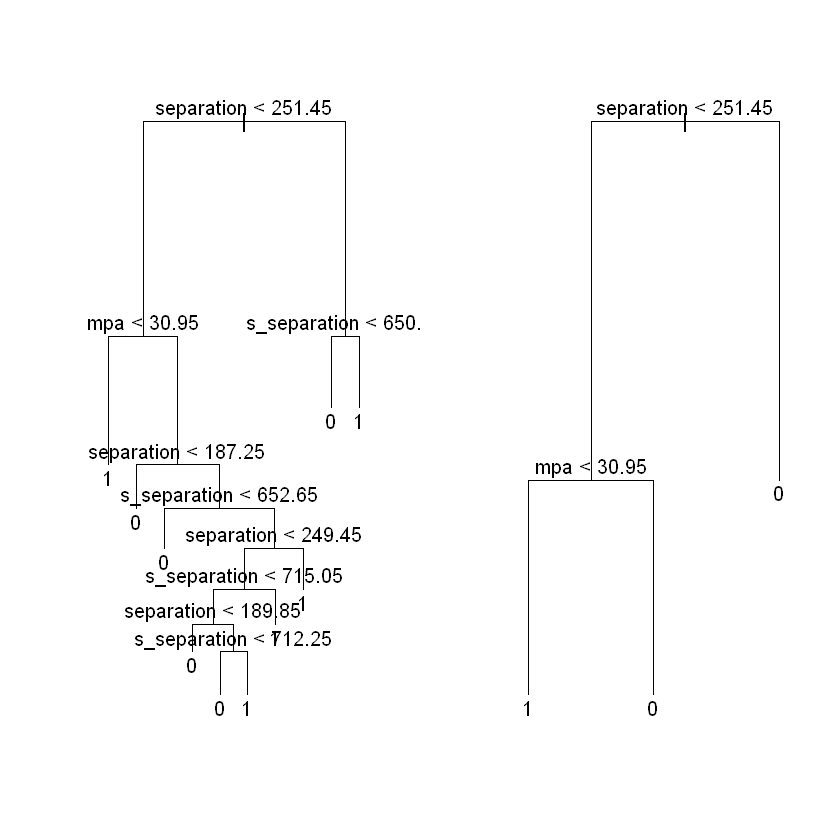

In [29]:
# 가지가 9개
par(mfrow = c(1,2))
prune.m <- prune.tree(m,best = 9)
plot(prune.m)
text(prune.m)
# 가지가 3개
prune.m <- prune.tree(m,best = 3)
plot(prune.m)
text(prune.m)

In [ ]:
#### 검증 데이터 예측하기 

In [30]:
# 가지치기를 한 모델 
yhat_test <- predict(prune.m, test, type = 'class')
# Cross Table
table <- table(real=test$y_faulty, predict = yhat_test)
table
# 정분류율
(table[1,1] +table[2,2])/sum(table) 

    predict
real    0    1
   0 5525   88
   1  730  155

[1] 0.8741151

In [32]:
# 가지치기를 하지 않은 모델
yhat_test <- predict(m, test, type = 'class')
# Cross Table
table <- table(real=test$y_faulty, predict = yhat_test)
table
# 정분류율
(table[1,1] +table[2,2])/sum(table) 

    predict
real    0    1
   0 5329  284
   1  231  654

[1] 0.9207448

#### ROC, AUC

#### 1차시기

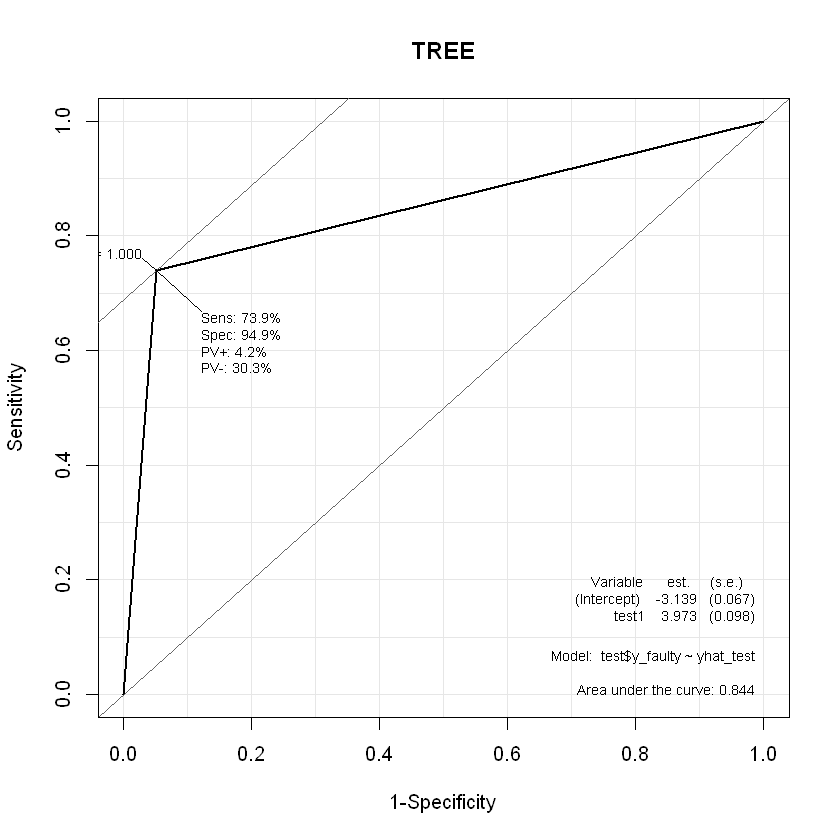

In [33]:
library(Epi)
ROC(test = yhat_test, stat = test$y_faulty, plot = 'ROC',AUC = T, main = 'TREE')

In [53]:
library(party)
library(caret)
library(rpart)

Loading required package: lattice
Loading required package: ggplot2


Warning message in par(nfrow = c(2, 2)):
""nfrow"는 그래픽 매개변수가 아닙니다"


Classification tree:
rpart(formula = factor(y_faulty) ~ fix_time + a_speed + b_speed + 
    separation + s_separation + rate_terms + mpa + load_time + 
    highpressure_time, data = train, method = "class")

Variables actually used in tree construction:
[1] b_speed      load_time    mpa          rate_terms   s_separation
[6] separation  

Root node error: 1957/15269 = 0.12817

n=15269 (152690 observations deleted due to missingness)

         CP nsplit rel error  xerror     xstd
1  0.127491      0   1.00000 1.00000 0.021107
2  0.045478      2   0.74502 0.74757 0.018585
3  0.027082      3   0.69954 0.70363 0.018086
4  0.021802      4   0.67246 0.68625 0.017884
5  0.020439      7   0.60705 0.65253 0.017480
6  0.013797      8   0.58661 0.58252 0.016596
7  0.012519      9   0.57282 0.53398 0.015943
8  0.012264     11   0.54778 0.50639 0.015555
9  0.011753     19   0.42616 0.48646 0.015267
10 0.010731     21   0.40266 0.47726 0.015131
11 0.010000     23   0.38120 0.45835 0.014848


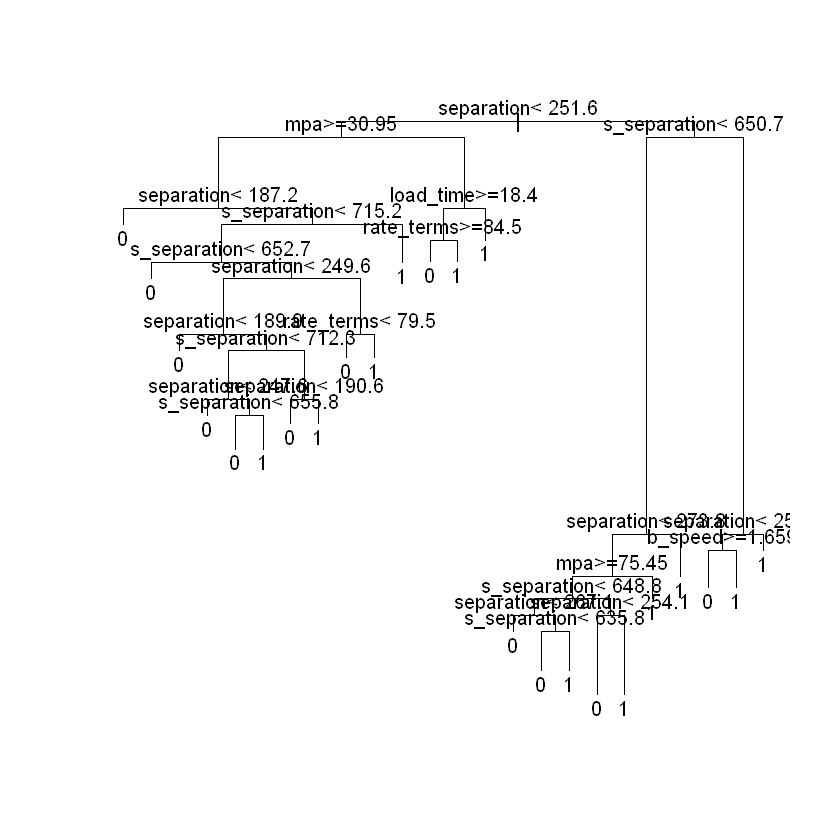

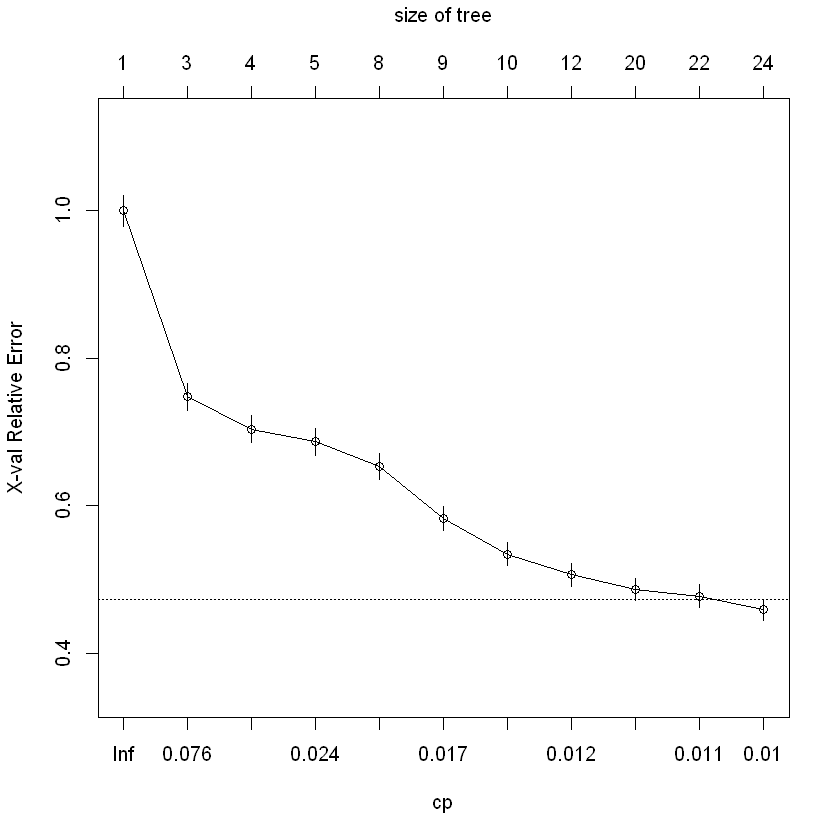

Confusion Matrix and Statistics

         
rpartpred    0    1
        0 5440  181
        1  173  704
                                          
               Accuracy : 0.9455          
                 95% CI : (0.9397, 0.9509)
    No Information Rate : 0.8638          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7676          
 Mcnemar's Test P-Value : 0.7099          
                                          
            Sensitivity : 0.7955          
            Specificity : 0.9692          
         Pos Pred Value : 0.8027          
         Neg Pred Value : 0.9678          
             Prevalence : 0.1362          
         Detection Rate : 0.1083          
   Detection Prevalence : 0.1350          
      Balanced Accuracy : 0.8823          
                                          
       'Positive' Class : 1               
                                          

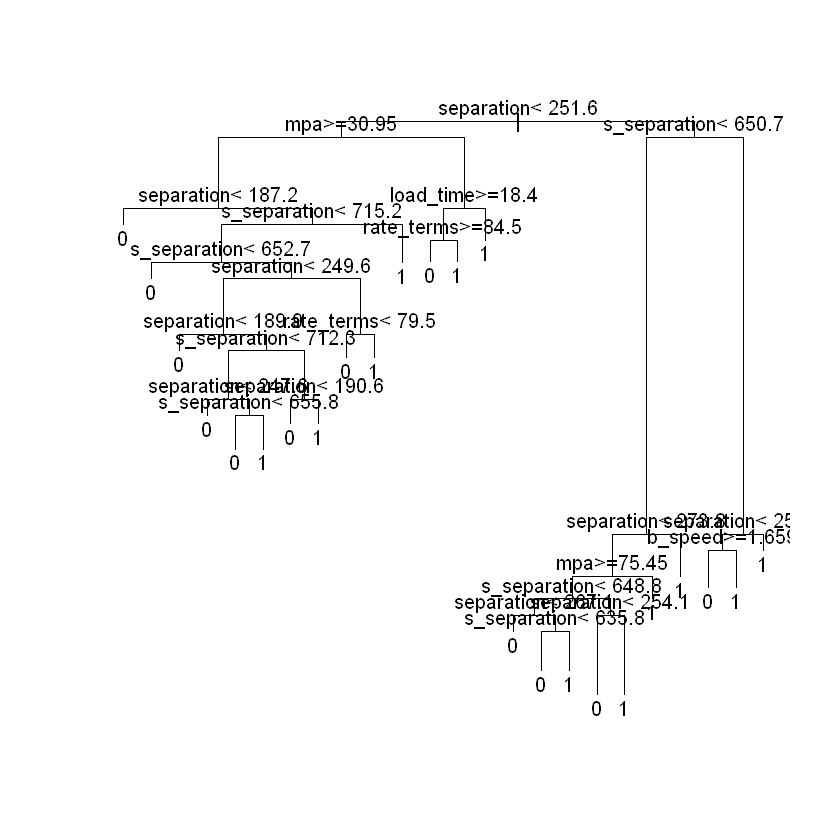

In [65]:
rpartmod<-rpart(factor(y_faulty)~ fix_time + a_speed + b_speed + separation + s_separation +
         rate_terms + mpa + load_time + highpressure_time , data = train, method="class")
plot(rpartmod)
text(rpartmod)

printcp(rpartmod)
plotcp(rpartmod)
ptree<-prune(rpartmod, cp= rpartmod$cptable[which.min(rpartmod$cptable[,"xerror"]),"CP"])
plot(ptree)
text(ptree)

rpartpred<-predict(ptree, test, type='class')
confusionMatrix(table(rpartpred, test$y_faulty),positive = "1") 

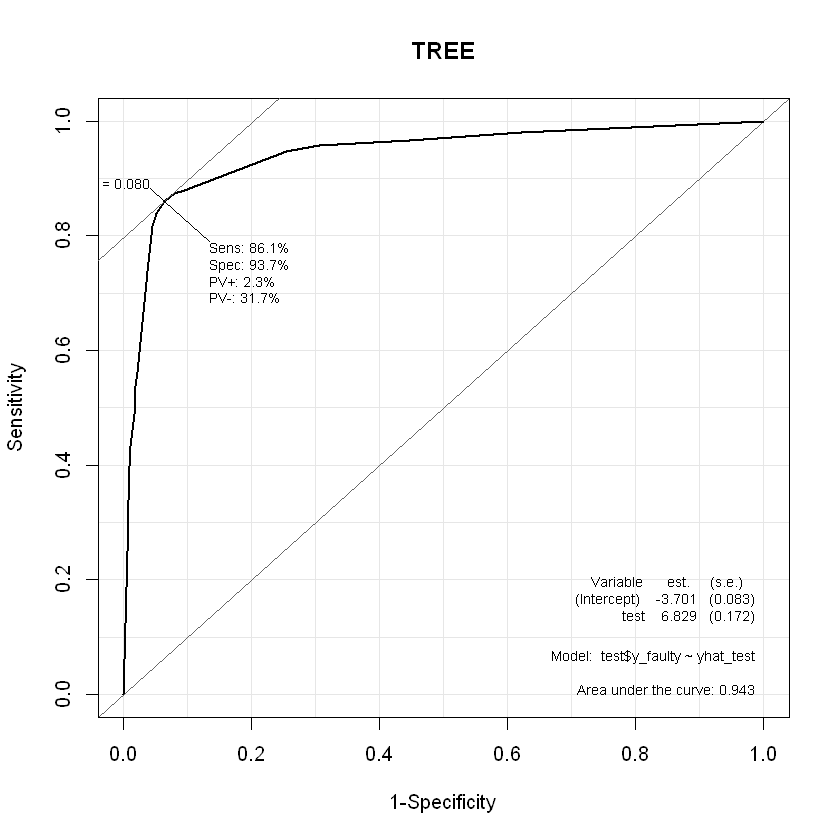

In [48]:
# rpart
yhat_test <- predict(m, test)
ROC(test = yhat_test, stat = test$y_faulty, plot = 'ROC',AUC = T, main = 'TREE')

In [60]:
# 정상으로 판정
new.data <- data.frame(fix_time = 87, a_speed = 0.609, b_speed = 1.175,
                      separation = 242.7, s_separation = 657.5,
                      rate_terms = 95, mpa = 78, load_time = 18.1,
                      highpressure_time = 82)
predict(m, newdata = new.data, type = 'class')

[1] 0
Levels: 0 1

In [67]:
# 하나는 정상, 하나는 불량으로 판정
new.data <- data.frame(fix_time = c(87,85.6), a_speed = c(0.609,0.472),
                       b_speed = c(1.175,1.685),
                      separation = c(242.7,243.4), s_separation = c(657.5,657.9),
                      rate_terms = c(95,95), mpa = c(78,28.8),
                       load_time =c(18.1,18.2),highpressure_time =c(82,60))
predict(m, newdata = new.data, type = 'class')

[1] 0 1
Levels: 0 1

#### 다항 종속변수에 대하여 의사결정나무 모형 만들기

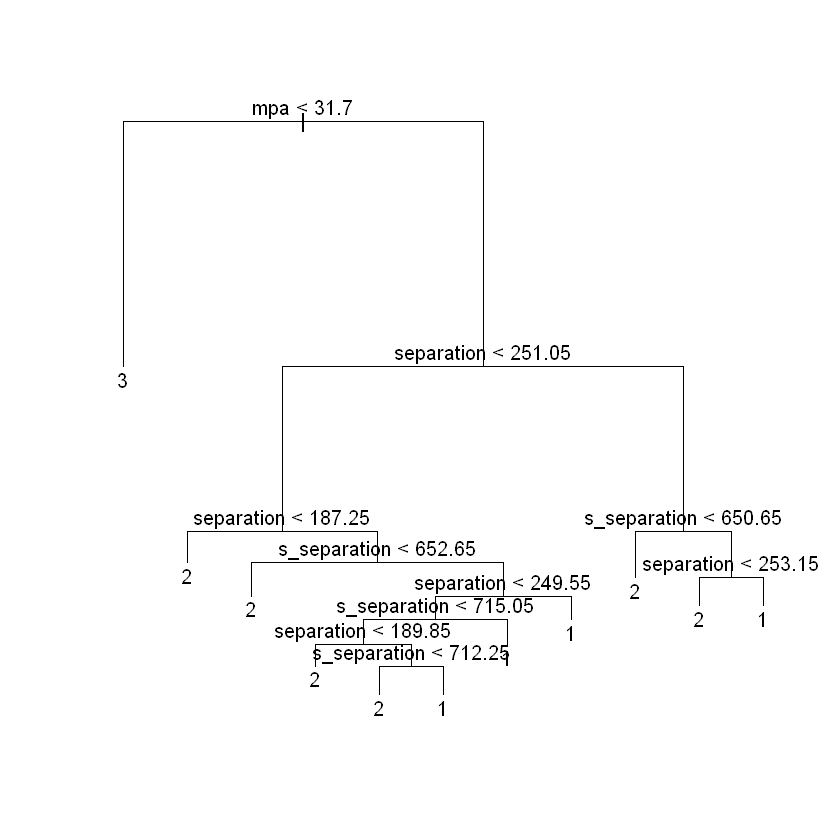

In [78]:

autoparts2$g_class <- as.factor(ifelse(autoparts2$c_thickness < 20,1,
                                      ifelse(autoparts2$c_thickness <32,2,3)))
t_index <- sample(1:nrow(autoparts2),size = nrow(autoparts2)*0.7)
train <- autoparts2[t_index,]
test <- autoparts2[-t_index,]

# 모델 구축
m <- tree(g_class ~ fix_time + a_speed + b_speed + separation +
          s_separation + rate_terms + mpa + load_time + highpressure_time , data = train)
plot(m)
text(m)


In [69]:
# test셋을 통해 예측값 도출 
# confusionMatrix를 활용하여 평가지표 생성 
yhat_test <- predict(m,test,type = 'class')
confusionMatrix(table(yhat_test, test$g_class),positive = "1") 

Confusion Matrix and Statistics

         
yhat_test    1    2    3
        1  404  141    0
        2  230 5354    6
        3    4  153  216

Overall Statistics
                                         
               Accuracy : 0.9179         
                 95% CI : (0.911, 0.9245)
    No Information Rate : 0.8679         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6643         
 Mcnemar's Test P-Value : < 2.2e-16      

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity           0.63323   0.9479  0.97297
Specificity           0.97598   0.7256  0.97502
Pos Pred Value        0.74128   0.9578  0.57909
Neg Pred Value        0.96076   0.6797  0.99902
Prevalence            0.09803   0.8679  0.03411
Detection Rate        0.06208   0.8227  0.03319
Detection Prevalence  0.08374   0.8589  0.05731
Balanced Accuracy     0.80460   0.8368  0.97400

#### 연속형 종속변수에 대하여 의사결정나무 모형 만들기 
> - 종속변수가 연속형이어도 모델 생성에서 달라질 부분은 없다
> - 단, predict에서 type ='class' 옵션을 사용하지 않는다. 
> - 또한 범주형이 아니므로 table()함수를 쓸 수 없다. 

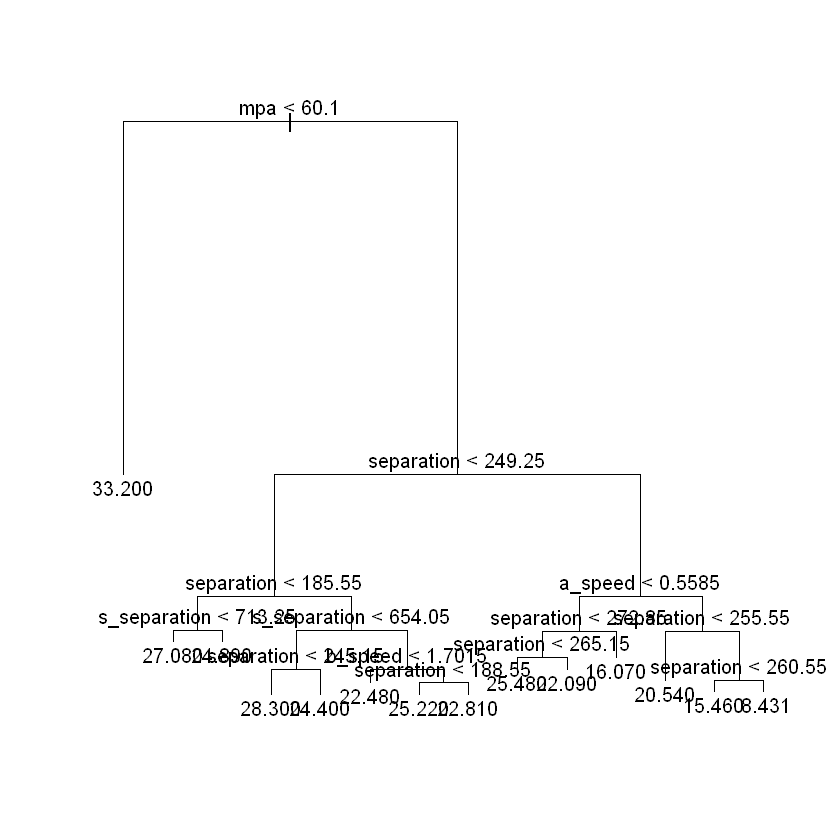

In [79]:
m <- tree(c_thickness ~ fix_time + a_speed + b_speed + separation +
          s_separation + rate_terms + mpa + load_time + highpressure_time , data = train)
plot(m)
text(m)

In [98]:
yhat_test <- predict(m,test)

In [99]:
a <- data.frame(yhat_test = yhat_test,c_thickness = test$c_thickness)
a$MSE <- (a$yhat_test - a$c_thickness)

In [100]:
mean((a$MSE)^2,na.rm = TRUE)

[1] 4.797368

#### 새로운 데이터 예측 (의사결정 나무 연속형)

In [101]:
# 단일 데이터 예측 
new.data <- data.frame(fix_time = 87, a_speed = 0.609, b_speed = 1.175,
                      separation = 242.7, s_separation = 657.5,
                      rate_terms = 95, mpa = 78, load_time = 18.1,
                      highpressure_time = 82)
predict(m, newdata = new.data)

1 
22.4776

In [103]:
# 복수 데이터 예측
new.data <- data.frame(fix_time = c(87,85.6), a_speed = c(0.609,0.472),
                       b_speed = c(1.175,1.685),
                      separation = c(242.7,243.4), s_separation = c(657.5,657.9),
                      rate_terms = c(95,95), mpa = c(78,28.8),
                       load_time =c(18.1,18.2),highpressure_time =c(82,60))
predict(m, newdata = new.data)

[1] 22.47760 33.20085

In [105]:
new.data <- data.frame(fix_time = test$fix_time, a_speed = test$a_speed,
                       b_speed = test$b_speed,
                      separation = test$separation, s_separation = test$s_separation,
                      rate_terms = test$rate_terms, mpa = test$mpa, 
                       load_time = test$load_time,
                      highpressure_time = test$highpressure_time)
head(predict(m, newdata = new.data))

1        2        3        4        5        6 
22.81456 22.47760 22.47760 22.47760 22.47760 20.53721